# Exercise 1: Design of Experiment Basics by Douglas C. Montgomery

Question 1
An article in Solid State Technology, “Orthogonal Design for Process Optimization and Its Application to Plasma Etching” by G. Z. Yin and D. W. Jillie (May 1987) describes an experiment to determine the effect of the C2F6 flow rate on the uniformity of the etch on a silicon wafer used in integrated circuit manufacturing. All of the runs were made in random order. Data for two flow rates are as follows:

In [1]:
sample1 = [2.7, 4.6, 2.6, 3.0, 3.2, 3.8]
sample2 = [4.6, 3.4, 2.9, 3.5, 4.1, 5.1]

In [2]:
# Pooled t-test:

import numpy as np
from scipy import stats
import statistics
import math

## Box Plot:

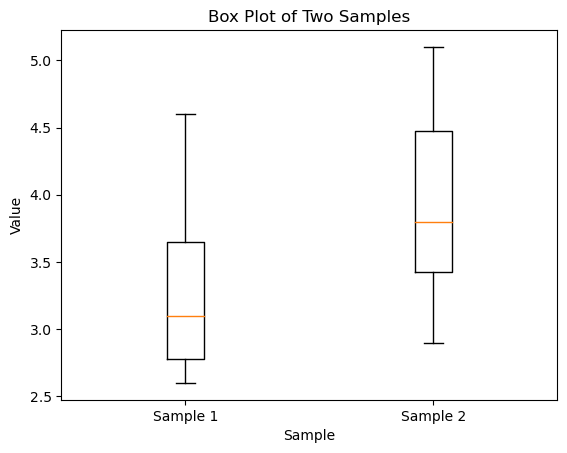

In [3]:
import matplotlib.pyplot as plt
# Combine the samples into a list
data_to_plot = [sample1, sample2]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Sample 1', 'Sample 2'])

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Box Plot of Two Samples')

# Display the plot
plt.show()

## Use scipy stats package

In [4]:
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)

In [5]:
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -1.349789758764916
P-value: 0.20684427155818652


## Manually calculate t0

In [6]:
y1 = sum(sample1) / len(sample1)
y2 = sum(sample2) / len(sample2)
S1 = statistics.variance(sample1)
S2 = statistics.variance(sample2)
n1 = len(sample1)
n2 = len(sample2)
print(y1, y2, S1, S2)

3.316666666666667 3.9333333333333336 0.5776666666666663 0.6746666666666664


In [7]:
S_p = math.sqrt(
                ((n1-1)*(S1) + (n2-1)*(S2))/(n1+n2-2)
               )
print(S_p)

0.7913069358135731


In [8]:
t_0 = (y1-y2)/(S_p*(math.sqrt(1/n1 + 1/n2)))
print(t_0)

-1.3497897587649161


# Check Variance

Does the C2F6 flow rate affect the wafer-to-wafer variability in etch uniformity, using α = 0.05?

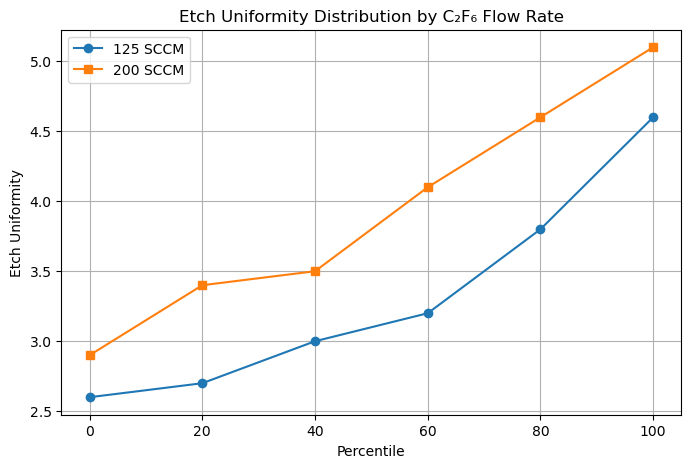

In [9]:
# Sort data
sorted_125 = np.sort(sample1)
sorted_200 = np.sort(sample2)

# Calculate percentiles
percentiles = np.linspace(0, 100, len(sorted_125))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(percentiles, sorted_125, marker='o', label='125 SCCM')
plt.plot(percentiles, sorted_200, marker='s', label='200 SCCM')

plt.xlabel('Percentile')
plt.ylabel('Etch Uniformity')
plt.title('Etch Uniformity Distribution by C₂F₆ Flow Rate')
plt.grid(True)
plt.legend()
plt.show()